### <font color="blue">Multi-Class Classification and PCA: Classifying Orthopedic Patients from Biomechanical Features</font>

Adam Hereth 

## Overview and Learning Objectives

The objective is to build a multi-class classifier that can predict orthopedic disease (three classes) and use PCA for dimensionality reduction.

This assignment will help with:
- better understanding of multi-classification and the challenges of imbalanced datasets
- better understanding and practice with PCA

## Part-I Multi-Class Classification with Imbalanced Dataset

Working with "**the biomechanical features of orthopedic patients**" dataset.
[kaggle page](https://www.kaggle.com/uciml/biomechanical-features-of-orthopedic-patients).

- The ML task is classifying patients as belonging to one out of three categories in `class` column: Normal (100 patients), Disk Hernia (60 patients) or Spondylolisthesis (150 patients). 

In [1]:
# Import all the necessary modules from python and sklearn
# You may start with pandas, numpy and matplotlib,
# and keep adding the necessary modules here as you move forward
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import seaborn as sns; sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the column_3C_weka.csv data as a dataframe using pandas
data = pd.read_csv("C:/Users/Adam/Desktop/Spring 2021/Machine Learning CMSC 478/Assignments/3/column_3C_weka.csv")

# Show the first five rows
data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


> This data is very clean; thus the preprocessing is minimal; however, you should always check if there is any NAs.

In [3]:
# Check if there is any NAs
data.isna().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

> Your target column for classification is `class`.

In [4]:
# Get feature vector X (all columns but "class") and target label y as "class"
X = data.drop(columns = ['class'])
y = data['class']

In [5]:
# Print X shape and head
print(X.shape)
X.head()

(310, 6)


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [6]:
# Print y shape, head, unique values and number of instances in each class
print(y.shape)
print(y.unique())
print(y.value_counts())

(310,)
['Hernia' 'Spondylolisthesis' 'Normal']
Spondylolisthesis    150
Normal               100
Hernia                60
Name: class, dtype: int64


> This indicates that the dataset is imbalanced meaning the number of instances in each class is not balanced, so you should be careful with model evaluation as working with imbalanced data requires specific performance metrics that can address the issue of unequal distribution of labels.

In [7]:
# Split the data to train and test with ratio of 70/30 for train/test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(217, 6)
(217,)
(93, 6)
(93,)


Next, you're going to build a classifier. Some classifiers like [Random Forests in sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) can directly be applied on multi-class classification and there is no need to use OvO and OvR strategies, so let's try RF for this problem.

 Apply `cross_val_score` on the whole dataset (not just train or test). full documentation of `cross_val_score` [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html).

> [The balanced accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html) in binary and multiclass classification tasks deals with imbalanced datasets. It is defined as the average of recall obtained on each class, so in this case the average of recall between three classes.

In [8]:
# Create a RandomForestClassifier - starting with default hyperparameters,
# Set the random_state=42
rf_clf = RandomForestClassifier(n_estimators = 100, max_leaf_nodes = 15, min_samples_split = 15,  max_depth = 7, random_state=42)

In [9]:
# Perform a 10-fold cross validation with scoring='balanced_accuracy'

rf_cv_score = cross_val_score(rf_clf, X, y, cv=10, scoring='balanced_accuracy')

print("Mean cv Score - Random Forest: ", rf_cv_score.mean())

Mean cv Score - Random Forest:  0.8


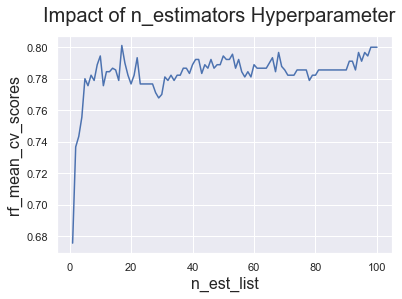

In [10]:
# Plot the impact of n_estimators hyperparameter on mean cv score as follows:

# 1- Write a for loop that iterates over n_estimators from 1 to 100
# 2- In each iteration, do a 10-fold cv with scoring='balanced_accuracy' and calculate rf_cv_score.mean()
# and append it to the list rf_mean_cv_scores
# 3- Finally, plot rf_mean_cv_scores on y-axis versus n_est_list on x-axis
#
rf_mean_cv_scores = []
n_est_list = range(1,101)
for i in range(1,101):
  rf_clf = RandomForestClassifier(n_estimators = i, max_leaf_nodes = 15, min_samples_split = 15,  max_depth = 7, random_state=42)
  rf_cv_score = cross_val_score(rf_clf, X, y, cv = 10, scoring='balanced_accuracy')
  x = rf_cv_score.mean()
  rf_mean_cv_scores.append(x)
x = n_est_list
z = rf_mean_cv_scores
plt.plot(x,z)
plt.suptitle('Impact of n_estimators Hyperparameter', fontsize=20)
plt.xlabel('n_est_list', fontsize=16)
plt.ylabel('rf_mean_cv_scores', fontsize=16)
plt.show()

In [11]:
# Fit the rf_clf on the training set
rf_clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, max_leaf_nodes=15, min_samples_split=15,
                       random_state=42)

In [12]:
# Get feature_importances of rf for all features
for name, score in zip(data, rf_clf.feature_importances_):
    print(name, score)

pelvic_incidence 0.12405751361603362
pelvic_tilt 0.06767032083012825
lumbar_lordosis_angle 0.11535606373336588
sacral_slope 0.1301600538820487
pelvic_radius 0.11019477583338486
degree_spondylolisthesis 0.4525612721050387


In [13]:
# Make predictions on the test set
y_pred = rf_clf.predict(X_test)

In [14]:
# Get the balanced accuracy of predictions on the test set
balanced_acc = balanced_accuracy_score(y_test, y_pred)
balanced_acc

0.8336940836940837

> The classification report reflects the challenge of this imbalanced dataset and clearly shows that the results for different classes significantly vary due to the imbalanced classes.

In [15]:
# Get classification report # Note: You must import the related module/method from sklearn to run this cell
print(classification_report(y_test, y_pred, ['Hernia', 'Normal', 'Spondylolisthesis']))

                   precision    recall  f1-score   support

           Hernia       0.82      0.67      0.74        21
           Normal       0.75      0.86      0.80        28
Spondylolisthesis       0.98      0.98      0.98        44

         accuracy                           0.87        93
        macro avg       0.85      0.83      0.84        93
     weighted avg       0.87      0.87      0.87        93



### Part-I Questions

Answer the following question HERE:

   Q1 [4 points] - According to `feature_importance` of RF classifier, (which works based on the average impurity reduction of the feature across all trees of the forest) what are the most important features in predicting `class`? Name the top three.
1. degree_spondylolisthesis
2. sacral_slope
3. pelvic_incidence

Q2 [2 points]- According to your plot of the impact of n_estimators on cv score, what is the best range for n_estimators?
The best range is (40 - 55). Even though the ranges at (85-100) is better, it will take longer for not that much change. The reason I would not want to choose earlier values, a little over/under 20, is due to the frequent change in the graph.  

Q3 [4 points] - According to classification report of RF classifier, which class is relatively easier to classify? Which class is the hardest to predict? 
Easiest: Spondylolisthesis, since the F1 score is the highest.
Hardest: Hernia, since the f1-score is the lowest


## Part II - PCA

In Part II, you're going to use Principal Component Analysis (PCA) for dimensionality reduction.

In [16]:
# Create a pca with 3 principal components, and apply it on X and store the transformed data in X3D
pca = PCA(n_components=3)
X3D = pca.fit_transform(X)

In [17]:
X3D.shape

(310, 3)

In [18]:
# Check the pca components
pca.components_.T[:,0]

array([ 0.32364565,  0.11319229,  0.30367474,  0.21045336, -0.02995983,
        0.86315378])

In [19]:
# Get the list of explained variance ratios for three PCs
pca.explained_variance_ratio_

array([0.70963571, 0.13759529, 0.07521804])

> You can see the coefficients of each Principal Component (PC) corresponding to each feature as each PC is a linear combination of features.

In [20]:
pc_df = pd.DataFrame(pca.components_,columns=X.columns,index = ['PC-1','PC-2', 'PC-3'])
pc_df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
PC-1,0.323646,0.113192,0.303675,0.210453,-0.029960,0.863154
PC-2,-0.476635,-0.098563,-0.532784,-0.378072,0.321809,0.482438
PC-3,-0.001545,-0.264657,-0.496542,0.263113,-0.774613,0.118941


In [21]:
# Split the data to train and test with ratio of 70/30 for train/test respectively
X3D_train, X3D_test, y_train, y_test = train_test_split(X3D, y, test_size=0.30)
print(X3D_train.shape)
print(y_train.shape)
print(X3D_test.shape)
print(y_test.shape)

(217, 3)
(217,)
(93, 3)
(93,)


In [22]:
# Create a RF classifier, set random_state=42, other hyperparameters should be the same as you tuned before
rf_clf = RandomForestClassifier(n_estimators = 100, max_leaf_nodes = 15, min_samples_split = 15,  max_depth = 7, random_state=42)

In [23]:
# Perform a 10-fold cross validation with scoring='balanced_accuracy'
# cross validation should be done on X3D and y
rf_cv_score_3D = cross_val_score(rf_clf, X3D, y, cv=10, scoring='balanced_accuracy')

print("Mean cv Score - Random Forest: ", rf_cv_score_3D.mean())

Mean cv Score - Random Forest:  0.7155555555555556


> So the mean cv score dropped after dimensionality reduction. We may have missed some information after PCA, but let's also check balanced accuracy on the test set.

In [24]:
# Fit the rf_clf on X3D_train
rf_clf.fit(X3D_train, y_train)

RandomForestClassifier(max_depth=7, max_leaf_nodes=15, min_samples_split=15,
                       random_state=42)

In [25]:
# Make predictions on X3D_test
y_pred_3D = rf_clf.predict(X3D_test)

In [26]:
# Get the balanced accuracy of predictions on X3D_test
balanced_acc_3D = balanced_accuracy_score(y_test, y_pred_3D)
balanced_acc_3D

0.7443667443667444

In [27]:
# Get classification report of RF on X3D_test predictions
print(classification_report(y_test, y_pred_3D, ['Hernia', 'Normal', 'Spondylolisthesis']))

                   precision    recall  f1-score   support

           Hernia       0.62      0.38      0.48        13
           Normal       0.78      0.85      0.81        33
Spondylolisthesis       0.96      1.00      0.98        47

         accuracy                           0.86        93
        macro avg       0.79      0.74      0.76        93
     weighted avg       0.85      0.86      0.85        93



> The balanced accuracy of the test set `X3D_test` dropped too, thus we need a methodic approach to find out the optimal number of PCs and the level of dimensionality reduction. One way is using the plot of explained variance ratio as a function of the number of dimensions (PCs).

> Plot the cumulative explained variance as a function of the number of principal components. This plot can tell you what the optimal number of PCs is.

> The cumulative explained variance of $n$ PCs is the sum of explained variance ratios of the first $n$ PCs. For example, the cumulative explained variance of two PCs is the sum of explained variance ratio of the first PC, i.e. 0.70963571, plus the 2nd PC, i.e. 0.13759529, thus it is 0.847231 (check the values of `explained_variance_ratio_`).

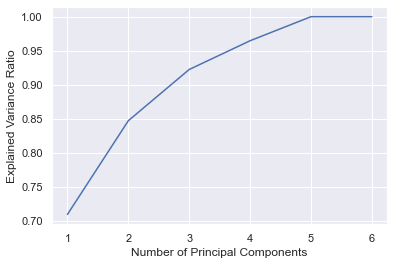

In [28]:
# Plot the cumulative explained variance as a function of number of principal components
# The plot should have `seaborn` style
# The plot should have correct axis labels, xticks/labels (1,2,3,4,5,6 number of PCs) precisely as the plot below
#axis = ['1', '2', '3', '4','5','6']
pca = PCA(n_components=6)
pca.fit(X)
p = np.cumsum(pca.explained_variance_ratio_)

plt.plot(['1', '2', '3', '4','5','6'], p)
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio');

### Part II Questions

Anwser the following question HERE:

Q4 [4 points] - Specify for each PC, which feature has the highest correlation (absolute value of the corresponding coeffieicent) with that PC? You should name the feature that has the highest (absolute value) coefficient in the `pc_df` dataframe above - the one which has PCs as rows.
PC1: degree_spondylolisthesis
PC2: lumbar_lordosis_angle	
PC3: pelvic_radius


Q5 [4 points] - Which of the 6 features has the highest importance in random forest `feature_importances_` which also has a high correlation with one of the 3 PCs returned by PCA? Notice that this can be an indication of consistency between PCA results and `feature_importances_` of RF classifier.
degree_spondylolisthesis


Q6 [12 points]
- **(a)** [2 points] - Based on the explained variance ratio plot, what is an appropriate number for principal compoenents if the goal is to preserve at least 97% of variance?
5


- **(b)** [5 points] What is the exact value of cumulative explained variance (a float number with two decimal places) when the number of principal components is 4? The cumulative explained variance for $n$ PCs is the sum of explained variance ratio of the first $n$ PCs. To answer this part, you must add a code cell below and get the cumulative explained variance when the number of PCs is four.
0.96


In [29]:
print(p)

[0.70963571 0.847231   0.92244904 0.9646918  1.         1.        ]


- **(c)** [5 points] Based on your answer to the part (a) and (b) of Q6, what is the mean cv score if you reduce to the number of dimensions while preserving at least 97% of variance? To answer this part, you must add a code cell below, do PCA while preserving at least 97% and report the mean cv score (same cv hyperparameters as before).


In [30]:
pca = PCA(n_components=5)
X3D = pca.fit_transform(X)
rf_cv_score_3D = cross_val_score(rf_clf, X3D, y, cv=10, scoring='balanced_accuracy')
print("Mean cv Score - Random Forest: ", rf_cv_score_3D.mean())

Mean cv Score - Random Forest:  0.8022222222222222
